# Projectile Motion

## Import "standard" libraries

In [2]:
# Import libraries first
%matplotlib inline
import numpy as np
import scipy.interpolate as interpol
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import sys, logging, os, re
import time

# import seaborn as sns
import scipy
import scipy.io as sio
from math import pi

***
## Contents (Draft)

- [Introduction](#Introduction)
- [Newton's law of universal gravitation](#Newton's-law-of-universal-gravitation)
    - [Part 1](#Part-1)
    - [Part 2](#Part-2)
    - [Part 3](#Part-3)
- [Exercise 1](#Exercise-1)
- [Exercise 2](#Exercise-2)
- [Exercise 3](#Exercise-3)
- [Escaping Earth](#Escaping-Earth)

## Introduction

- An application of motion in two dimensions
- Projectile: a body that is launched into the air and is allowed to move freely
- General motion of a projectile is complicated and depends on (those factors are neglected for simplicity):
:
    - the air resistance
    - the rotation of the earth
    - the variation in the acceleration of gravity
    

<figure>
  <img src="https://physicslight.files.wordpress.com/2014/04/projectile_animation.gif" alt="Projectile Animation" style="width:70%">
  <figcaption>Source: https://physicslight.wordpress.com/</figcaption>
</figure>

## Parameter's Set-up:
* The projectile has a constant acceleration directed vertically downward with magnitude $g=9.81 m/s^2$. 
* The y axis is vertical with the positive direction upward 
* The x axis is horizontal with the positive direction in the direction of the original horizontal component of the projectile's velocity $u$

***
* The acceleration is split into the following two components:
    * $a_y = -g$ (vertical motion with constant acceleration) -(blue arrow)
    * $a_x = 0$ (horizontal motion with constant speed)

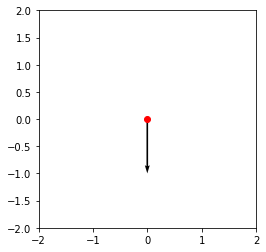

In [3]:
# Acceleration
plt.plot(0,0,'or')
plt.quiver([0, 0], [0, 0], [0, 0], [0, -1], angles='xy', scale_units='xy', color=['r','k'],scale=1)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.axes().set_aspect('equal')

***
* The projectile is launched from the origin with an initial speed _$u_0$_ (green arrow) at angle $\theta$ with the horizontal
* The initial velocity can be split into two compontents:
    * $u_{0x} = u_0 \cdot cos \theta$ (red arrow)
    * $u_{0y} = u_0 \cdot sin \theta$ (blue arrow)

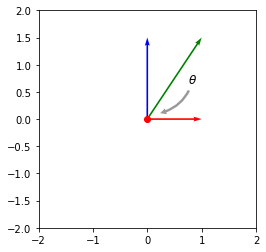

In [4]:
# Velocity
plt.plot(0,0,'or')
plt.quiver([0, 0,0], [0, 0,0], [1, 0,1], [0, 1.5,1.5], angles='xy', scale_units='xy', color=['r','b','g'],scale=1)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.axes().set_aspect('equal')
plt.annotate(r'$\theta$',
            xy=(0.2, 0.1), xycoords='data',
            xytext=(30, 30), textcoords='offset points',
            size=12,
            # bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="simple",
                            fc="0.6", ec="none",
                            connectionstyle="arc3,rad=-0.3"))

***
* The two components of the velocity will then be:
    * $u_x = u_{0x}$, as there is no horizontal acceleration
    * $u_y= u_{0y} -g \cdot t$, motion with constant acceleration
    
***
* The two components of the displacement will have the following expresions:
    * $\Delta x = u_{0x}\cdot t$
    * $\Delta y = u_{0y}\cdot t - \frac{1}{2}\cdot g \cdot t^2$
        

## Ploting the projectile trajectory

In [5]:
theta=np.pi/4 #angle theta with respect to horizontal (45degrees)
v0=10 # intial velocity

x0=0; # initial position
y0=0;

t0=0 #initial time
tf=2 #final time
dt=1e-1 #time step size


In [6]:
g=9.8 #m/s^2

vx0=v0*np.cos(theta) # x component of velocity at initial time step
vy0=v0*np.sin(theta) # y component of velocity at initial time step

t=np.arange(t0,tf,dt) # creates an array that holds each time point
nt=len(t) #the number of time steps we willl have
nt

20

In [7]:
x=np.zeros(nt)
y=np.zeros(nt)
vx=np.zeros(nt)
vy=np.zeros(nt)

x[0]=x0
y[0]=y0
vx[0]=vx0
vy[0]=vy0

In [8]:
for i in range(1,nt):
    x[i]=x[i-1]+vx[i-1]*dt
    y[i]=y[i-1]+vy[i-1]*dt

    vx[i]=vx[i-1]
    vy[i]=vy[i-1]-g*dt

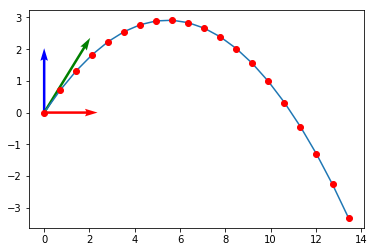

In [9]:
plt.plot(x,y)
plt.plot(x,y,'ro')
plt.quiver([0, 0,0], [0, 0,0], [vx[1], 0,vy[1]], [0,vy[1],vx[1]], angles='xy', scale_units='xy', color=['r','b','g'],scale=3)

## Range & Time of flight

* The time of flight $t_f$ is twice the time $t_h$ the projectile takes to reach its maximum height and it can be found by setting the vertical component of its velocity equal to zero.
$$ u_y = u_{0y} - g\cdot t_h = 0$$
$$ t_h = \frac{u_{0y}}{g}$$
$$ t_f = 2 \cdot t_h$$

* The range $R$ is the distance traveled within $t_f$ along the x direction:
$$ R = u_{0x} \cdot t_f = u_{0x} \cdot \frac{2u_{0y}}{g}$$
$$ R = \frac{2 \cdot u_0 \cdot cos \theta \cdot u_0 \cdot sin \theta}{g}$$
$$ R = \frac{2 \cdot u_0^2 \cdot cos \theta \cdot sin \theta}{g}$$
$$ sin 2\theta = 2 sin \theta \cdot cos \theta $$

* The equation of the range is given by:
$$ R = \frac{2 \cdot u_0^2 \cdot sin 2\theta}{g}$$

* The maximum value of $R$ occurs when $\theta=45^{o}$

## Exercise 1

Find the maximum Range of a projectile when the angle theta is equal to 45 degrees and its launched with 100m/s.

In [28]:
def R(theta,u0):
    pass
### BEGIN SOLUTION
def R(theta,u0):
    R = None
    g = 9.81    
    R = 2*u0**2*np.sin(2*np.deg2rad(theta))/g
    return R
### END SOLUTION

In [29]:
theta = 45 # degrees
u0 = 10  #m/s

In [30]:
print(R(theta,u0)) #meters

20.3873598369


## Exercise 2

Plot the trajectories for theta equal to 10,20,30,45,55,60 and 89 degrees with initial velocity 20 m/s. At which angle do we achive maximum Range? Calculate the intividual ranges.

theta= 10 , Range= 27.8915509338
theta= 20 , Range= 52.4189691895
theta= 30 , Range= 70.6238861394
theta= 45 , Range= 81.5494393476
theta= 55 , Range= 76.6314063842
theta= 60 , Range= 70.6238861394
theta= 89 , Range= 2.8460343896


(0, 20)

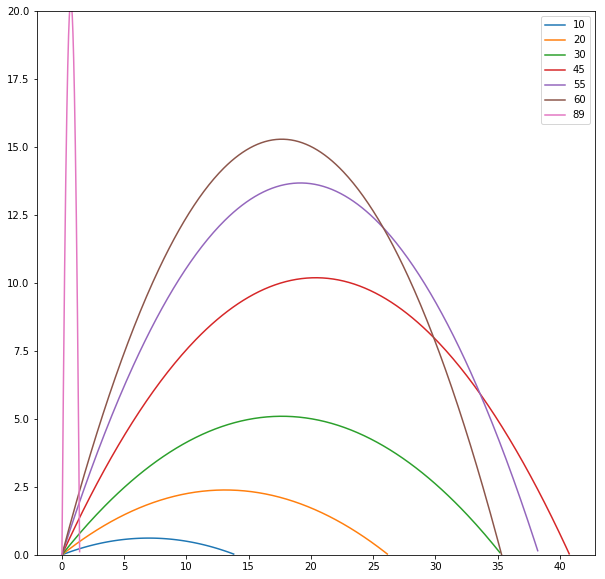

In [39]:
plt.figure(figsize=(10, 10))
size=4000
t=np.linspace(0,40,size)

theta=[10,20,30,45,55,60,89]
y0=0
u0=20
g=9.81

x=np.zeros(size)
y=np.zeros(size)
for j in range(0,len(theta)):
    for i in range(0,t.size):
        x[i]=u0*t[i]*np.cos(np.deg2rad(theta[j]))
        y[i]=y0+u0*t[i]*np.sin(np.deg2rad(theta[j]))-1/2*g*t[i]**2
    plt.plot(x[y>=0],y[y>=0],label=theta[j])
    print('theta=',theta[j],', Range=',R(theta[j],u0))

plt.legend()
plt.ylim(0,20)